Youssef Elsyed  -  222101935

# **Section 1**


In [5]:
# we will use the folloiwng to import other notebook files to use their variables,lists,functions,etc.
import import_ipynb
import utils as helper_function

In [3]:
import pandas as pd

import matplotlib.pyplot as plt

### 1.Prepare a dataset of at least 100,000 users, > 1000 products, and > 1 million ratings.

In [ ]:

df = pd.read_csv("ratings.csv")


In [ ]:
print(df.head(10))


In [ ]:
# Count unique users 
unique_users = {}
for row in df['userId']:
    if row not in unique_users:     
        unique_users[row] = True
num_users = 0
for _ in unique_users:
    num_users += 1
print("Number of users:", num_users)


# Count unique items 
unique_items = {}
for row in df['movieId']:
    if row not in unique_items:
        unique_items[row] = True
num_items = 0
for _ in unique_items:
    num_items += 1
print("Number of items:", num_items)


# Count ratings  
num_ratings = 0
for _ in df['rating']:
    num_ratings += 1
print("Number of ratings:", num_ratings)


Number of users: 162541
Number of items: 59047
Number of ratings: 25000095


### 2.Preprocess the dataset to adjust the rating on a 1 to 5 scale.

all the rating values are already between 1-5 , so no need to this step with this dataset.

### 3. Calculate the number of ratings for each user (nu) and save it


In [ ]:
nu = {}  # dictionary: userId -> count     (userid , number of ratings by that user)

# Loop through each row and count occurrences
for user in df['userId']:
    if user not in nu:
        nu[user] = 1
    else:
        nu[user] += 1

print("\nNumber of ratings per user (nu):")

# print first 5 users manually (not using head)
counter = 0
for user, count in nu.items():
    print(user, ":", count)
    counter += 1
    if counter == 5:
        break



Number of ratings per user (nu):
1 : 70
2 : 184
3 : 656
4 : 242
5 : 101


### 4. Calculate the number of ratings for each item (ni) and save it


In [92]:
# Step 1: Count ratings per item manually
ni = {}
for item in df['movieId']:
    if item not in ni:
        ni[item] = 1
    else:
        ni[item] += 1

# Step 2: Find the smallest movieId each time and print first 5
print("\nNumber of ratings per item (ni):")

printed = 0
used = []  # store printed keys to avoid repetition

while printed < 5:
    smallest = None
    
    # find smallest key not printed yet
    for key in ni:
        if key not in used and (smallest is None or key < smallest):
            smallest = key
    
    print(smallest, ni[smallest])
    used.append(smallest)
    printed += 1



Number of ratings per item (ni):
1 57309
2 24228
3 11804
4 2523
5 11714


### 5. Compute the average ratings per user (ru) and save it


In [93]:
ru = {}      # sum of ratings per user
count = {}   # number of ratings per user

for i in range(len(df['userId'])):
    u = df['userId'][i]
    r = df['rating'][i]
    
    if u in ru:
        ru[u] = ru[u] + r
        count[u] = count[u] + 1
    else:
        ru[u] = r
        count[u] = 1

for u in ru:
    avg = ru[u] / count[u]
    ru[u] = round(avg, 2)   # round to 2 decimals



In [190]:
print("\nAverage ratings per user (ru):")

printed = 0
for u in ru:
    print(u, ":", ru[u])
    printed += 1
    if printed == 10:
        break



Average ratings per user (ru):
1 : 3.81
2 : 3.63
3 : 3.7
4 : 3.38
5 : 3.75
6 : 4.15
7 : 3.64
8 : 3.61
9 : 3.87
10 : 3.45


### 6. Compute the average ratings per item (ri) and save it


In [326]:
# Compute average rating per item (movieId)
ri = {}      # sum of ratings per item
count = {}   # number of ratings per item

for i in range(len(df['movieId'])):
    m = df['movieId'][i]
    r = df['rating'][i]
    
    if m in ri:
        ri[m] = ri[m] + r
        count[m] = count[m] + 1
    else:
        ri[m] = r
        count[m] = 1

for m in ri:
    avg = ri[m] / count[m]
    ri[m] = round(avg, 2)   # round to 2 decimals



In [96]:
print("\nAverage ratings per item (ri):")

printed = 0
for m in ri:
    print(m, ":", ri[m])
    printed += 1
    if printed == 10:
        break



Average ratings per item (ri):
296 : 4.19
306 : 4.07
307 : 3.98
665 : 3.95
899 : 4.05
1088 : 3.25
1175 : 3.96
1217 : 4.14
1237 : 4.09
1250 : 4.1


### 7. Ascendingly order the total number of ratings per item and plot the distribution per item


In [ ]:
# ni dictionary already exists: movieId -> count

# Convert ni items to list of tuples
ni_items = []
for key in ni:
    ni_items.append((key, ni[key]))


# Use merge sort
sorted_ni = helper_function.merge_sort(ni_items)



In [99]:

# Print first 
print("Ratings per item sorted ascendingly:")
for i in range(min(10, len(sorted_ni))):
    print(sorted_ni[i][0], ":", sorted_ni[i][1])



Ratings per item sorted ascendingly:
180989 : 1
190289 : 1
151367 : 1
139905 : 1
152441 : 1
179957 : 1
185015 : 1
192083 : 1
195505 : 1
196107 : 1


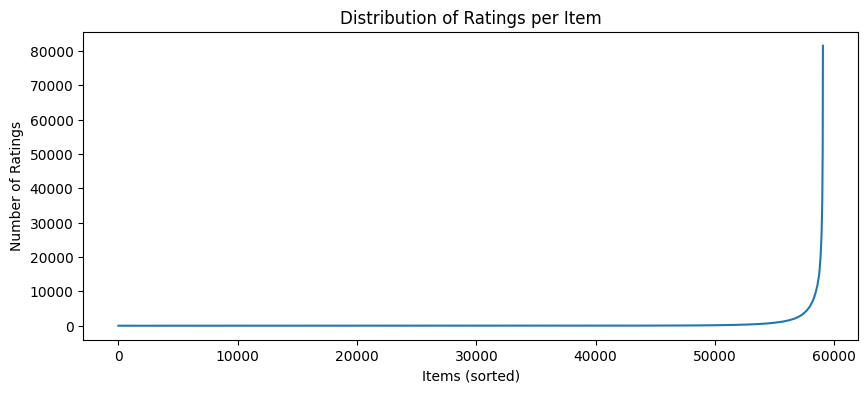

In [100]:


counts = [item[1] for item in sorted_ni]

plt.figure(figsize=(10,4))
plt.plot(counts)
plt.title("Distribution of Ratings per Item")
plt.xlabel("Items (sorted)")
plt.ylabel("Number of Ratings")
plt.show()

### 8. Compute number of products based on their average ratings (percentage groups)


In [101]:
### 8. Compute the number of products based on their average ratings in Groups (G1 to G10)

# Initialize empty lists for each group to store the Movie IDs
# G1: <= 1%
# G2: 1% - 5%
# G3: 5% - 10%
# G4: 10% - 20%
# G5: 20% - 30%
# G6: 30% - 40%
# G7: 40% - 50%
# G8: 50% - 60% (Corrected from prompt context)
# G9: 60% - 70%
# G10: 70% - 100%

g1 = []
g2 = []
g3 = []
g4 = []
g5 = []
g6 = []
g7 = []
g8 = []
g9 = []
g10 = []

# Loop through the Average Ratings dictionary (ri) created in Task 6
for movie_id in ri:
    avg = ri[movie_id]
    
    # Calculate percentage (assuming max rating is 5.0)
    percent = (avg / 5.0) * 100
    
    # Check which group the product belongs to
    if percent <= 1:
        g1.append(movie_id)
    elif percent > 1 and percent <= 5:
        g2.append(movie_id)
    elif percent > 5 and percent <= 10:
        g3.append(movie_id)
    elif percent > 10 and percent <= 20:
        g4.append(movie_id)
    elif percent > 20 and percent <= 30:
        g5.append(movie_id)
    elif percent > 30 and percent <= 40:
        g6.append(movie_id)
    elif percent > 40 and percent <= 50:
        g7.append(movie_id)
    elif percent > 50 and percent <= 60:
        g8.append(movie_id)
    elif percent > 60 and percent <= 70:
        g9.append(movie_id)
    elif percent > 70 and percent <= 100:
        g10.append(movie_id)

# Print the number of products in each group
print("Number of products per group:")
print("G1 (<= 1%):", len(g1))
print("G2 (1-5%):", len(g2))
print("G3 (5-10%):", len(g3))
print("G4 (10-20%):", len(g4))
print("G5 (20-30%):", len(g5))
print("G6 (30-40%):", len(g6))
print("G7 (40-50%):", len(g7))
print("G8 (50-60%):", len(g8))
print("G9 (60-70%):", len(g9))
print("G10 (70-100%):", len(g10))

Number of products per group:
G1 (<= 1%): 0
G2 (1-5%): 0
G3 (5-10%): 543
G4 (10-20%): 722
G5 (20-30%): 1260
G6 (30-40%): 3158
G7 (40-50%): 6731
G8 (50-60%): 13860
G9 (60-70%): 18286
G10 (70-100%): 14487


G3: 543 
this means that there is 543 product each product of the 543 product its average rating is among the 5-10% of all products average ratings. 

### 9. Compute the total number of ratings in each group and order them ascendingly


In [ ]:
### 9. Compute the total number of ratings in each group and order them ascendingly

# Helper function to sum ratings for a list of items
# We use the 'ni' dictionary (number of ratings per item) from Task 4
# get_total_ratings was here



# Calculate totals for each group
t1 = helper_function.get_total_ratings(g1, ni)
t2 = helper_function.get_total_ratings(g2, ni)
t3 = helper_function.get_total_ratings(g3, ni)
t4 = helper_function.get_total_ratings(g4, ni)
t5 = helper_function.get_total_ratings(g5, ni)
t6 = helper_function.get_total_ratings(g6, ni)
t7 = helper_function.get_total_ratings(g7, ni)
t8 = helper_function.get_total_ratings(g8, ni)
t9 = helper_function.get_total_ratings(g9, ni)
t10 = helper_function.get_total_ratings(g10, ni)

# Create a list of lists to store [GroupName, TotalCount]
# This is our dataset to sort
group_data = [
    ["G1", t1], ["G2", t2], ["G3", t3], ["G4", t4], 
    ["G5", t5], ["G6", t6], ["G7", t7], ["G8", t8], 
    ["G9", t9], ["G10", t10]
]


# Perform the sort
sorted_groups = helper_function.quick_sort(group_data)

print("\nTotal ratings per group (Sorted Ascendingly):")
for item in sorted_groups:
    print(item[0], ":", item[1])


Total ratings per group (Sorted Ascendingly):
G1 : 0
G2 : 0
G3 : 620
G4 : 1512
G5 : 12123
G6 : 107152
G7 : 582209
G8 : 2593907
G9 : 7075578
G10 : 14626994


### 10. Plot the distribution before and after ordering


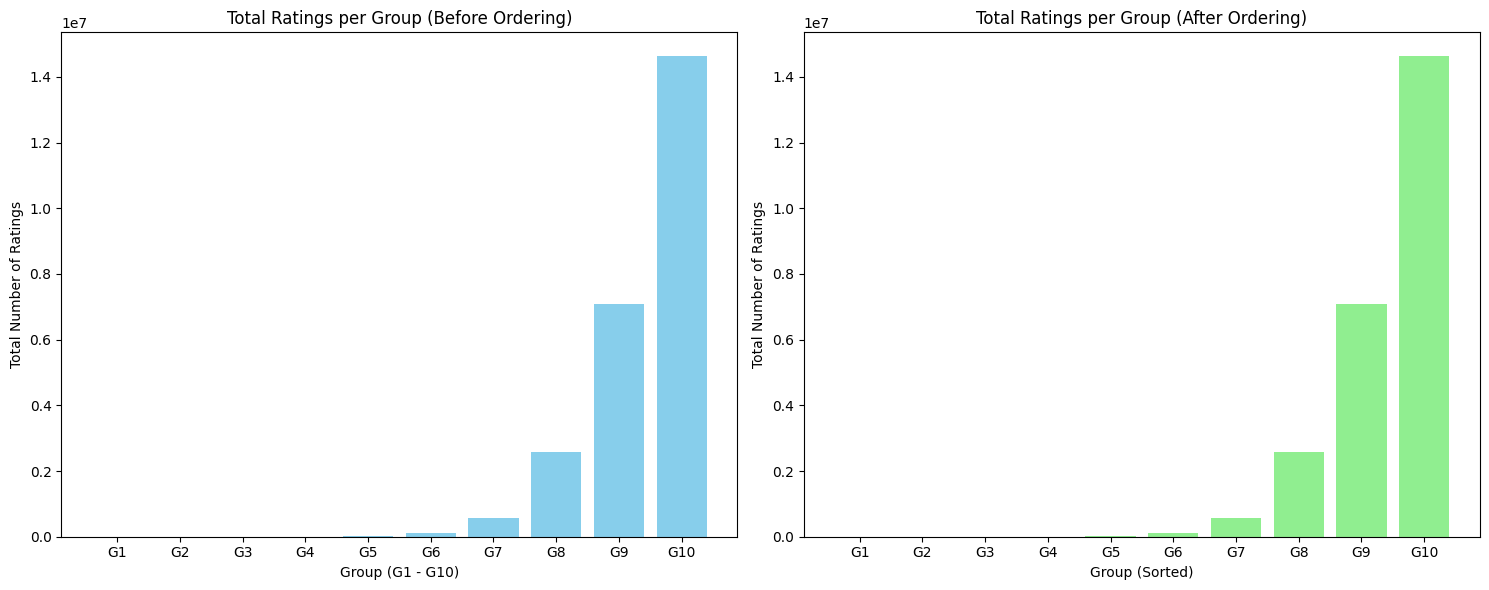

In [ ]:
import matplotlib.pyplot as plt

# 1. Before Ordering:
# We strictly follow the group order G1 to G10
labels_before = ["G1", "G2", "G3", "G4", "G5", "G6", "G7", "G8", "G9", "G10"]
# Map the group names to their totals calculated in Task 9
values_before = [
    helper_function.get_total_ratings(g1, ni), helper_function.get_total_ratings(g2, ni), 
    helper_function.get_total_ratings(g3, ni), helper_function.get_total_ratings(g4, ni),
    helper_function.get_total_ratings(g5, ni), helper_function.get_total_ratings(g6, ni), 
    helper_function.get_total_ratings(g7, ni), helper_function.get_total_ratings(g8, ni), 
    helper_function.get_total_ratings(g9, ni), helper_function.get_total_ratings(g10, ni)
]

# 2. After Ordering:
# We use the sorted_groups list we created in Task 9 using QuickSort
# sorted_groups structure is [['G_name', Total], ...]
labels_after = []
values_after = []

for item in sorted_groups:
    labels_after.append(item[0])
    values_after.append(item[1])

# --- Plotting ---

plt.figure(figsize=(15, 6))

# Subplot 1: Before Ordering
plt.subplot(1, 2, 1)
plt.bar(labels_before, values_before, color='skyblue')
plt.title("Total Ratings per Group (Before Ordering)")
plt.xlabel("Group (G1 - G10)")
plt.ylabel("Total Number of Ratings")

# Subplot 2: After Ordering (Ascending)
plt.subplot(1, 2, 2)
plt.bar(labels_after, values_after, color='lightgreen')
plt.title("Total Ratings per Group (After Ordering)")
plt.xlabel("Group (Sorted)")
plt.ylabel("Total Number of Ratings")

plt.tight_layout()
plt.show()

in this dataset the plots are similar(because its already ordered) , i tried another dataset to ensure and the outputs are different . 

### 11. Select three target users:

### Ul with <= 2% ratings
### U2 with ratings >2% and <=5%
### U3 with ratings >5% and <=10%


In [106]:
# in the following i calculate the  U1, U2, U3 users based on their percentage of total ratings
# while U1 is : any user of users that its total number of rating is less than 2% of total number of ratings

total_ratings = num_ratings

U1 = None
U2 = None
U3 = None

for user in nu:
    percent = round((nu[user] / total_ratings) * 100, 2)

    if percent <= 2 and U1 is None:
        U1 = user
    elif percent > 2 and percent <= 5 and U2 is None:
        U2 = user
    elif percent > 5 and percent <= 10 and U3 is None:
        U3 = user

    if U1 is not None and U2 is not None and U3 is not None:
        break

print("Target Users:")

# Print U1
if U1 is not None:
    print("U1 (<=2%):", U1, "-", round((nu[U1]/total_ratings)*100, 5), "%")
else:
    print("U1 (<=2%) : No user found in this percentage range")

# Print U2
if U2 is not None:
    print("U2 (2-5%):", U2, "-", round((nu[U2]/total_ratings)*100, 2), "%")
else:
    print("U2 (2-5%) : No user found in this percentage range")

# Print U3
if U3 is not None:
    print("U3 (5-10%):", U3, "-", round((nu[U3]/total_ratings)*100, 2), "%")
else:
    print("U3 (5-10%) : No user found in this percentage range")


Target Users:
U1 (<=2%): 1 - 0.00028 %
U2 (2-5%) : No user found in this percentage range
U3 (5-10%) : No user found in this percentage range


in our dataset there is no users have a number of rating more that 2% of total number of ratings so i can't found U2 and U3 

So i will select two users to be U2 and U3(to complete the prediction process) , U1 is alrady exist from the previous cell

In [107]:
# Assuming U1 was found in the previous cell and saved in variable U1
# If not, replace with the actual user ID found (e.g., 1)

U1 = 1     # from previous cell output
U2 = 30    # manually selected user ID
U3 = 500   # manually selected user ID

print("Selected target users:")
print(f"U1 (from previous): {U1}")
print(f"U2 (manual): {U2}")
print(f"U3 (manual): {U3}")

# Save for later use
target_users = [U1, U2, U3]


Selected target users:
U1 (from previous): 1
U2 (manual): 30
U3 (manual): 500


### 12. Select two target items: Select the two lowest rated items (11 and 12) as target items

In [347]:
### 12. Select two target items: lowest rated

# Build list of (movieId, averageRating)
item_avg_list = []
for m in ri:
    item_avg_list.append((m, ri[m]))

# Manual search for two smallest averages
I1 = None
I2 = None

# Find smallest
for item in item_avg_list:
    if I1 is None or item[1] < I1[1]:
        I1 = item

# Find second smallest
for item in item_avg_list:
    if item != I1:
        if I2 is None or item[1] < I2[1]:
            I2 = item

print("Target Items:")
print("I1, Lowest Rated:", I1)
print("I2, Second Lowest Rated:", I2)


Target Items:
I1, Lowest Rated: (179185, 0.5)
I2, Second Lowest Rated: (190903, 0.5)


### 13. Count the number of co-rating users between each target user and other users and the number of co-rated items between each target item and other items (No_coRated_items).

In [109]:
# Prepare mappings: user -> set of items, and item -> set of users
user_items = {}
item_users = {}

for i, row in df.iterrows():
    u = row['userId']
    m = row['movieId']

    if u not in user_items:
        user_items[u] = set()
    user_items[u].add(m)

    if m not in item_users:
        item_users[m] = set()
    item_users[m].add(u)

# Target users and items from previous cells
# (make sure U1, U2, U3 and I1, I2 are assigned)

target_users = [U1, U2, U3]
target_items = [I1[0], I2[0]]  # extract movieId from tuples (movieId, avgRating)

# 1. Count co-rating users for each target user
co_rating_users_counts = {}

for tu in target_users:
    if tu not in user_items:
        co_rating_users_counts[tu] = 0
        continue

    co_raters = set()
    tu_items = user_items[tu]

    for other_user, other_items in user_items.items():
        if other_user == tu:
            continue
        # Check if intersection not empty (co-rated at least one item)
        if tu_items.intersection(other_items):
            co_raters.add(other_user)

    co_rating_users_counts[tu] = len(co_raters)

# 2. Count co-rated items for each target item
co_rated_items_counts = {}

for ti in target_items:
    if ti not in item_users:
        co_rated_items_counts[ti] = 0
        continue

    co_rated_items = set()
    ti_users = item_users[ti]

    for other_item, other_users in item_users.items():
        if other_item == ti:
            continue
        # Check if intersection not empty (co-rated by at least one user)
        if ti_users.intersection(other_users):
            co_rated_items.add(other_item)

    co_rated_items_counts[ti] = len(co_rated_items)

# Print results
print("Number of co-rating users per target user:")
for u, count in co_rating_users_counts.items():
    print(f"User {u}: {count}")

print("\nNumber of co-rated items per target item:")
for i, count in co_rated_items_counts.items():
    print(f"Item {i}: {count}")


Number of co-rating users per target user:
User 1: 129187
User 30: 128093
User 500: 120331

Number of co-rated items per target item:
Item 179185: 67
Item 190903: 1199


### 14. Determine the threshold ß: maximum number of users who have co-rated at least 30% of items with each target user.




In [ ]:
# manual_intersection_size was here

In [ ]:
threshold_percent = 30.0

beta_counts = {}   # store count for each target user

for tu in target_users:
    
    if tu not in user_items:
        beta_counts[tu] = 0
        continue
    
    tu_items = user_items[tu]
    tu_item_count = len(tu_items)

    count_users = 0

    # Compare target user with every user
    for other_user in user_items:

        if other_user == tu:
            continue
        
        other_items = user_items[other_user]

        # Calculate common items
        common_count = helper_function.manual_intersection_size(tu_items, other_items)

        # percentage
        percent = (common_count / tu_item_count) * 100
        percent = round(percent, 2)

        if percent >= threshold_percent:
            count_users += 1
    
    beta_counts[tu] = count_users


# Compute β (maximum)
beta = 0
for u in beta_counts:
    if beta_counts[u] > beta:
        beta = beta_counts[u]

# Print results
print("Co-rated users (>=30%) for each target user:")
for u in beta_counts:
    print(f"User {u} : {beta_counts[u]}")

print("\nβ (Threshold) =", beta)


Co-rated users (>=30%) for each target user:
User 1 : 1956
User 30 : 17886
User 500 : 23166

β (Threshold) = 23166



### 15. Save all intermediate results for use in later parts.



the results are saved and ready to use in the following parts 

### 16. Compare the results from point 13 & 14 and give your insights into the dataset by evaluating and discussing the matrix sparsity, rating bias and long-tail problems. Give your comments in a separate section in your report.

This task's answer is in the report